***
# <font color=purple size=10>DeepLearning using Keras</font>
***

# <font color='purple'>Problem </font>
<hr style='border: 2px solid purple;'>

**Training a model to classify clothes based on a dataset**

# <font color='red'>Importing</font>
<hr style='border: 1px solid red;'>

In [1]:
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [32]:
import numpy as np

In [4]:
dataset = keras.datasets.fashion_mnist

In [5]:
((image_training, id_training), (image_test, id_test)) = dataset.load_data() #this function will return 2 tuples, that will be our test and training data

# <font color='red'>Working with the data</font>
<hr style='border: 1px solid red;'>

In [6]:
image_training.shape

(60000, 28, 28)

**So we have a training image database formed by 60.000 images with 28 x 28px size**

In [7]:
len(image_test)

10000

**So we have a test image database formed by 10.000 images with 28 x 28px size**

### <font color='green'>To visualize the images</font>
<hr style='border: 1px solid green;'>

In [8]:
import matplotlib.pyplot as plt

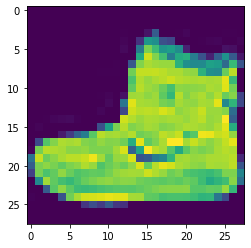

In [9]:
plt.imshow(image_training[0])

**Let's check something:**

Text(0.5, 1.0, '9')

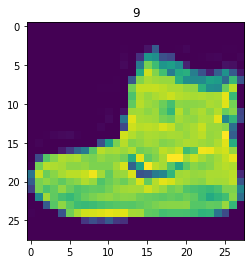

In [10]:
plt.imshow(image_training[0])
plt.title(id_training[0])

**We can see the number 9 on top of image**

In [11]:
id_training

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**here we can see it is an array, so we can check the min an max values to see with how many categories we are dealing**

In [12]:
id_training.min()

0

In [13]:
id_training.max()

9

**So we have a total of 10 classifications**

In [14]:
total_class = 10

**To visualize some of this categories**

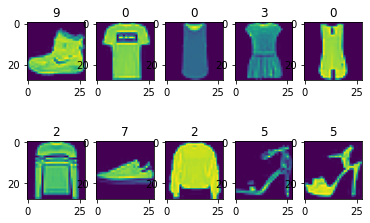

In [15]:
for image in range(10):   #show 10 itens from our list
    plt.subplot(2, 5, image + 1) #the number of lines and columns and iterating the images
    plt.imshow(image_training[image]) #to show the image
    plt.title(id_training[image]) #to show the title

### <font color='green'>To change the classification of numbers to the real name of the classes</font>
<hr style='border: 1px solid green;'>

**Checking the labels on the dataset website : https://github.com/zalandoresearch/fashion-mnist**

In [16]:
names_classifications=['T-shit', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


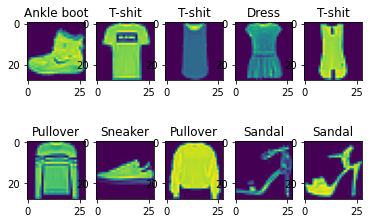

In [17]:
for image in range(10):   #show 10 itens from our list
    plt.subplot(2, 5, image + 1) #the number of lines and columns and iterating the images
    plt.imshow(image_training[image]) #to show the image
    plt.title(names_classifications[id_training[image]]) #to show the title
    

**Now we have a better result**

# <font color='red'>Creating the model: entry, processing and exit</font>
<hr style='border: 1px solid red;'>

**model = #entry
          #processing
          #end**

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28))
])

2022-06-24 10:11:26.758049: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**To eliminate the error above**

In [19]:
import os

In [20]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

**Entry:**

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28))
])

**Processing:**

**The Dense funcition will do the conection between all the itens of layer 0 (entry) with the second layer (processing)**

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28))
    keras.layers.Dense(256, activation = tensorflow.nn.relu) #always use even numbers
])

SyntaxError: invalid syntax (716018474.py, line 3)

In [28]:
image_training.shape

(60000, 28, 28)

**End:**

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tf.nn.relu), #always use even numbers
    keras.layers.Dense(10, activation = tf.nn.softmax)      #10 like the number of classes we have
])

### <font color='green'>Creating the model:</font>
<hr style='border: 1px solid green;'>

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

In [ ]:
model.fit(image_training, id_training)

### <font color='green'>Color scale and normalization:</font>
<hr style='border: 1px solid green;'>

**This process will reduce loss**

In [ ]:
plt.imshow(image_training[0])
plt.colorbar()

In [ ]:
image_training = image_training/float(255)       #255 from the colorbar max

In [ ]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tf.nn.relu), #always use even numbers
    keras.layers.Dense(10, activation = tf.nn.softmax)      #10 like the number of classes we have
])

In [ ]:
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

In [ ]:
model2.fit(image_training, id_training)

### <font color='green'>Improving the layers:</font>
<hr style='border: 1px solid green;'>

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tf.nn.relu), #always use even numbers
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)      #10 like the number of classes we have
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

In [ ]:
model.fit(image_training, id_training)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tf.nn.relu), #always use even numbers
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(64, activation = tf.nn.relu),
    keras.layers.Dense(32, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)      #10 like the number of classes we have
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')
model.fit(image_training, id_training)

**Result: Increasing the number of layers, for this example, is not helping the model**

# <font color='red'>Runtime</font>
<hr style='border: 1px solid red;'>

**Returning to the first model:**

-----------------------------------------------------------------------------------------------------------------------------

**Sometimes the values of variables like the LOSS will be the same even when you change the model, this happens because the jupyternotebook is keeping the variable saved in the memory, to solve the problem you have to restart the kernel and run all the cells again**

-----------------------------------------------------------------------------------------------------------------------------

In [24]:
image_training = image_training/float(255)

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tf.nn.relu), #always use even numbers
    keras.layers.Dense(10, activation = tf.nn.softmax)      #10 like the number of classes we have
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', epochs = 5)
model.fit(image_training, id_training)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.6111


# <font color='red'>Training Accuracy: </font>
<hr style='border: 1px solid red;'>

### <font color='green'>Increasing the number of epochs:</font>
<hr style='border: 1px solid green;'>

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tf.nn.relu), #always use even numbers
    keras.layers.Dense(10, activation = tf.nn.softmax)      #10 like the number of classes we have
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')
model.fit(image_training, id_training, epochs = 5) #to traine the model more times and Increase the accuracy

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6044
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3717
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3316
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3063
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2891


### <font color='green'>Accuracy parameter :</font>
<hr style='border: 1px solid green;'>

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tf.nn.relu), #always use even numbers
    keras.layers.Dense(10, activation = tf.nn.softmax)      #10 like the number of classes we have
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(image_training, id_training, epochs = 5) #to traine the model more times and Increase the accuracy

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6076 - accuracy: 0.7854
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3628 - accuracy: 0.8682
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3316 - accuracy: 0.8784
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3085 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2880 - accuracy: 0.8909


**So we can see the loss decreasing and the accuracy increasing**

# <font color='red'>Testing the model: </font>
<hr style='border: 1px solid red;'>

In [31]:
test = model.predict(image_test)

In [33]:
test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

**Arrray with 10 positions, now we have to check the max argument**

In [35]:
print('The text result is:', np.argmax(test[0]))
print('The number of test image is:', id_test[0])

The text result is: 9
The number of test image is: 9


**So we can see our model is matching the results**

**Another test:**

In [36]:
print('The text result is:', np.argmax(test[1]))
print('The number of test image is:', id_test[1])

The text result is: 2
The number of test image is: 2


In [37]:
print('The text result is:', np.argmax(test[2]))
print('The number of test image is:', id_test[2])

The text result is: 1
The number of test image is: 1


# <font color='red'>Model evaluation and validation: </font>
<hr style='border: 1px solid red;'>

### <font color='green'>Evaluation :</font>
<hr style='border: 1px solid green;'>

In [39]:
loss_test, accuracy_test = model.evaluate(image_test, id_test)

313/313 [==============================] - 0s 758us/step - loss: 58.8652 - accuracy: 0.8515


In [41]:
print('The test loss is:', loss_test)
print('The test accuracy is:', accuracy_test)

The test loss is: 58.865211486816406
The test accuracy is: 0.8514999747276306


### <font color='green'>Validation :</font>
<hr style='border: 1px solid green;'>

In [62]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tf.nn.relu), #always use even numbers
    keras.layers.Dense(10, activation = tf.nn.softmax)      #10 like the number of classes we have
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
historic = model.fit(image_training, id_training, epochs = 10, validation_split = 0.2) #validation

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6283 - accuracy: 0.7806 - val_loss: 0.4163 - val_accuracy: 0.8433
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3828 - accuracy: 0.8612 - val_loss: 0.3573 - val_accuracy: 0.8701
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3352 - accuracy: 0.8769 - val_loss: 0.3779 - val_accuracy: 0.8610
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3182 - accuracy: 0.8826 - val_loss: 0.3506 - val_accuracy: 0.8756
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2851 - accuracy: 0.8933 - val_loss: 0.3167 - val_accuracy: 0.8845
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2773 - accuracy: 0.8946 - val_loss: 0.3342 - val_accuracy: 0.8807
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2594 - accuracy: 0.9041 - val_loss: 0.3262 - val_accuracy:

In [63]:
historic

In [64]:
historic.history

{'loss': [0.5039569735527039,
  0.37701669335365295,
  0.3328363299369812,
  0.31049367785453796,
  0.2889949679374695,
  0.2750416696071625,
  0.263037770986557,
  0.24858158826828003,
  0.24040326476097107,
  0.23218631744384766],
 'accuracy': [0.823395848274231,
  0.8627499938011169,
  0.8769791722297668,
  0.8849791884422302,
  0.8929583430290222,
  0.8965208530426025,
  0.9028124809265137,
  0.9080208539962769,
  0.9098333120346069,
  0.9127916693687439],
 'val_loss': [0.4162842333316803,
  0.35734111070632935,
  0.37789419293403625,
  0.35062235593795776,
  0.3167194426059723,
  0.33422696590423584,
  0.3261587619781494,
  0.3171131908893585,
  0.32347166538238525,
  0.3327448070049286],
 'val_accuracy': [0.8433333039283752,
  0.8700833320617676,
  0.8610000014305115,
  0.8755833506584167,
  0.8845000267028809,
  0.8806666731834412,
  0.8844166398048401,
  0.8891666531562805,
  0.8901666402816772,
  0.8880833387374878]}

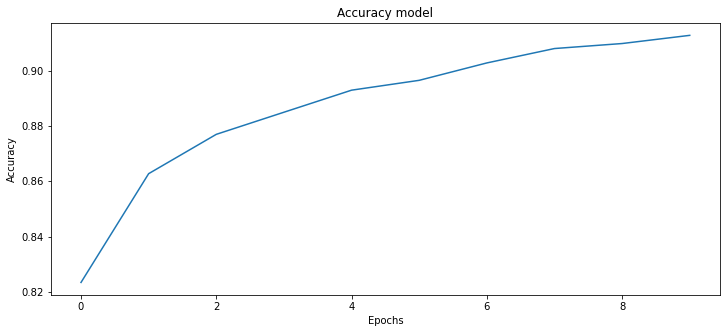

In [65]:
plt.figure(figsize =(12,5))
plt.title('Accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(historic.history['accuracy'])

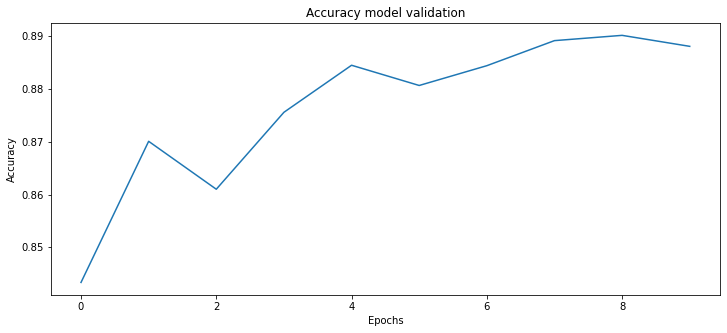

In [66]:
plt.figure(figsize =(12,5))
plt.title('Accuracy model validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(historic.history['val_accuracy'])

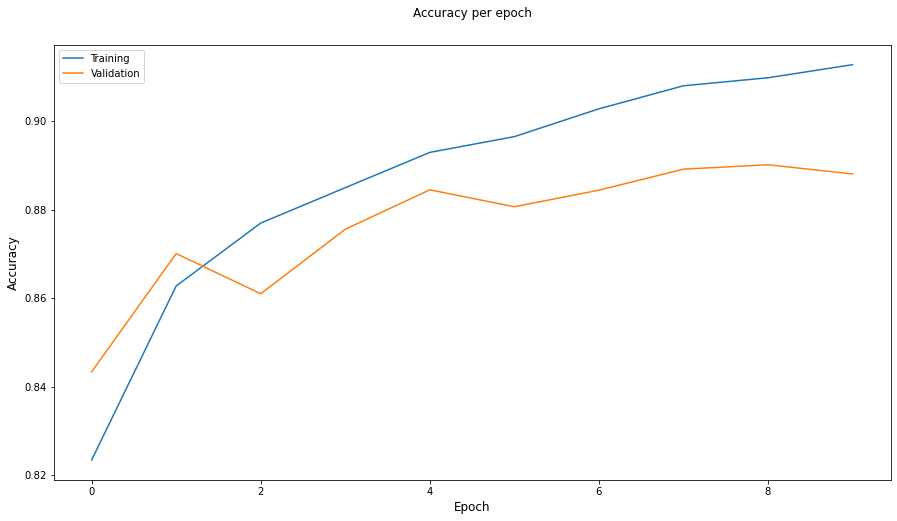

In [67]:
plt.figure(figsize = (15,8))
plt.plot(historic.history['accuracy'])
plt.plot(historic.history['val_accuracy'])
plt.title('Accuracy per epoch', y = 1.05, fontsize = 12)
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
plt.legend(['Training', 'Validation'], fontsize = 10)


### <font color='green'>Including loss:</font>
<hr style='border: 1px solid green;'>

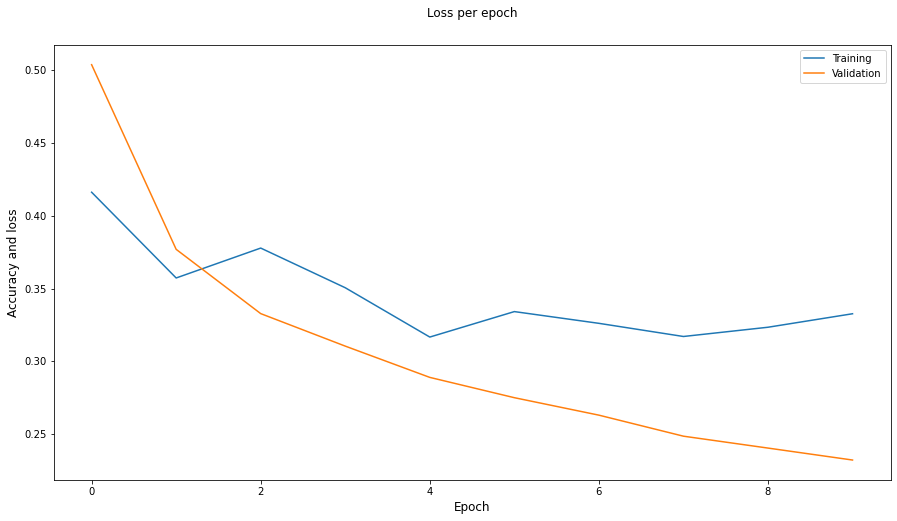

In [68]:
plt.figure(figsize = (15,8))
plt.plot(historic.history['val_loss'])
plt.plot(historic.history['loss'])
plt.title('Loss per epoch', y = 1.05, fontsize = 12)
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Accuracy and loss', fontsize = 12)
plt.legend(['Training', 'Validation'], fontsize = 10)

**Is always interesting to have both graphics as close as possible**

### <font color='green'>Adding dropout parameter to the model:</font>
<hr style='border: 1px solid green;'>

In [73]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tf.nn.relu),
    keras.layers.Dropout(0.2),  #this means that 20% of our cells will be 'sleeping'
    keras.layers.Dense(10, activation = tf.nn.softmax)      #10 like the number of classes we have
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
historic = model.fit(image_training, id_training, epochs = 5, validation_split = 0.2) #validation

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6571 - accuracy: 0.7659 - val_loss: 0.4129 - val_accuracy: 0.8507
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4075 - accuracy: 0.8496 - val_loss: 0.3767 - val_accuracy: 0.8573
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3663 - accuracy: 0.8668 - val_loss: 0.3585 - val_accuracy: 0.8706
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3395 - accuracy: 0.8762 - val_loss: 0.3390 - val_accuracy: 0.8765
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3300 - accuracy: 0.8782 - val_loss: 0.3455 - val_accuracy: 0.8734


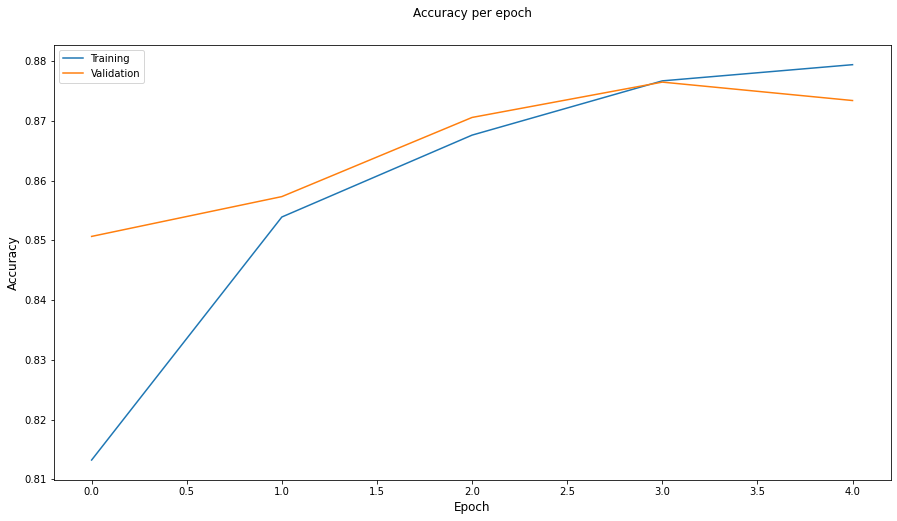

In [74]:
plt.figure(figsize = (15,8))
plt.plot(historic.history['accuracy'])
plt.plot(historic.history['val_accuracy'])
plt.title('Accuracy per epoch', y = 1.05, fontsize = 12)
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
plt.legend(['Training', 'Validation'], fontsize = 10)

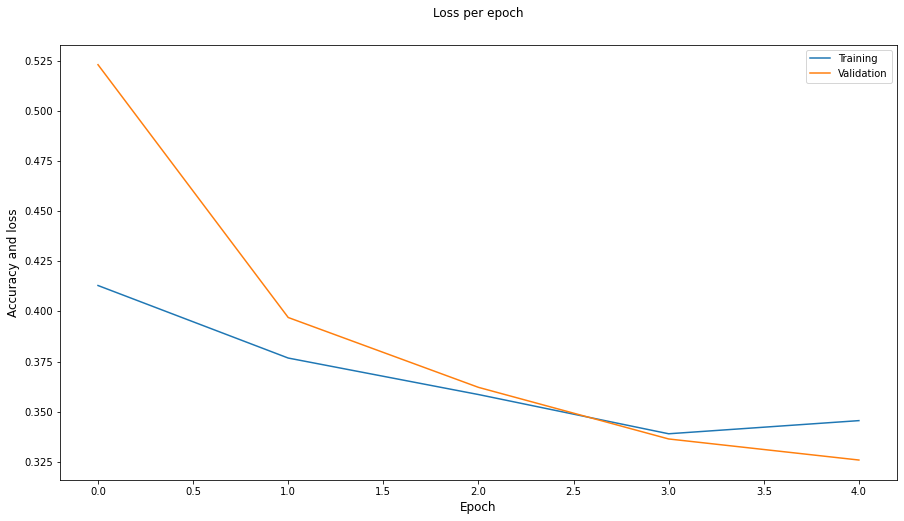

In [75]:
plt.figure(figsize = (15,8))
plt.plot(historic.history['val_loss'])
plt.plot(historic.history['loss'])
plt.title('Loss per epoch', y = 1.05, fontsize = 12)
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Accuracy and loss', fontsize = 12)
plt.legend(['Training', 'Validation'], fontsize = 10)

**Now we can see better results in our model after decreasing the number of active cells of the model**

# <font color='red'>Saving the model: </font>
<hr style='border: 1px solid red;'>

In [78]:
from tensorflow.keras.models import load_model

In [79]:
model.save('model.h5')

In [80]:
model_saved = load_model('model.h5')

In [81]:
test = model.predict(image_test)

In [82]:
print('The text result is:', np.argmax(test[1]))
print('The number of test image is:', id_test[1])

The text result is: 2
The number of test image is: 2


In [83]:
test_model_saved = model_saved.predict(image_test)

In [84]:
print('The text result is:', np.argmax(test_model_saved[1]))
print('The number of test image is:', id_test[1])

The text result is: 2
The number of test image is: 2


**All good**